<a href="https://colab.research.google.com/github/LeNovice/PSW/blob/main/IDS_Assignment_discarded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group No

## Group Member Names:
1. WADIKAR PINAK SUHAS [2020sc04158]
2. HIMANSHU SINGHAL [2020sc04154]
3.



# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?

   Ans: Chronic Kidney Disease is a persistant disease which is difficult to detect. We can ensure whether a particular person is susceptible to Chronic Kidney Disease using attributes like his Age, BP etc. We are trying to develop a classification model which classifies whether a person is Susceptible to Chronic Kidney Disease
   2. What data do you need to answer the above problem?

   Ans: For this particular task we need about 25 different parameters to classify a person to be susceptible to CKD. The parameters are listed below:
>*   age - age
>*   bp - blood pressure
>*   sg - specific gravity
>*   al - albumin
>*   su - sugar
>*   rbc - red blood cells
>*   pc - pus cell
>*   pcc - pus cell clumps
>*   ba - bacteria
>*   bgr - blood glucose random
>*   bu - blood urea
>*   sc - serum creatinine
>*   sod - sodium
>*   pot - potassium
>*   hemo - hemoglobin
>*   pcv - packed cell volume
>*   wc - white blood cell count
>*   rc - red blood cell count
>*   htn - hypertension
>*   dm - diabetes mellitus
>*   cad - coronary artery disease
>*   appet - appetite
>*   pe - pedal edema
>*   ane - anemia
Finally we have class which predicts CKD or Non-CKD patient
   3. What are the different sources of data?

   Ans: The data is collected from a research survey in Apollo Hospitals,TamilNadu, India. Similar data can be scraped from any official websited like WHO where details of such patients are stored. The data selected is not pre-cleaned and we need to analyse the data to build an efficient model.

   4. What kind of analytics task are you performing?

   Ans: In this project, we are performing Predictive Analytics since we are building a classification model. Raw data cleanup is done where we ise imputers to fill missing values. After that Data condensation/Discretization is done to convert Nominal attributes to numerical equivalents. Duplicate entries are checked for and removed if present. We have also used Univariate Filters to filter data.



In [89]:
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests, csv 
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
#We use Decision tree for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc. 

(Data downloaded from website like Kaggle will be awarded negative marks.)

## 2.1 Code for scraping data from website



In [90]:
##---------Type the code below this line------------------##
CSV_URL = 'https://raw.githubusercontent.com/ParvN/Chronic-Kidney-Disease-Classification/master/ckd.csv'
with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

## 2.2 Code for converting the above scraped data into a dataframe

In [91]:
##---------Type the code below this line------------------##
raw_DF = pd.DataFrame(my_list)
raw_DF.columns = raw_DF.iloc[0] 
raw_DF = raw_DF[1:]
raw_DF.replace('?', np.nan, inplace=True)
#display(raw_DF)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
1,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
2,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [69]:
##---------Type the code below this line------------------##
print("Top 5")
display(raw_DF.head())
print("Bottom 5")
display(raw_DF.tail())

Top 5


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
1,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
2,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
4,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


Bottom 5


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
400,58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,18,1.1,141,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [70]:
##---------Type the code below this line------------------##
DF_columns = raw_DF.columns.values
print(DF_columns)
display(raw_DF.describe(percentiles=None))
display(raw_DF.dtypes)
print("\nShape of DataFrame" + str(raw_DF.shape))

['age' 'bp' 'sg' 'al' 'su' 'rbc' 'pc' 'pcc' 'ba' 'bgr' 'bu' 'sc' 'sod'
 'pot' 'hemo' 'pcv' 'wbcc' 'rbcc' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane'
 'class']


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391,388,353,354,351,248,335,396,396,356,381,383,313,312,348,329,294,269,398,398,398,399,399,399,400
unique,76,10,5,6,6,2,2,2,2,146,118,84,34,40,115,42,89,45,2,2,2,2,2,2,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,99,46,1.2,135,3.5,15,41,9800,5.2,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,10,15,40,40,30,16,21,11,18,251,261,364,317,323,339,250


0
age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object


Shape of DataFrame(400, 25)


## 2.5 Write your observations from the above. 
1. Size of the dataset

Ans: As displayed in above code snippet, Size of dataset is 400 rows and 25 columns including the target variable
2. What type of data attributes are there?

Ans: We have Nominal, Numerical and Binary attributes in the above dataset

3. Is there any null data that has to be cleaned?

Ans: Null data is present and while building the data, we have replaced Null data with '?'


# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [71]:
##---------Type the code below this line------------------##
for i in DF_columns:
    print("Number of Unique values for attribute " + i + " = " , raw_DF[i].unique().shape[0])

Number of Unique values for attribute age =  77
Number of Unique values for attribute bp =  11
Number of Unique values for attribute sg =  6
Number of Unique values for attribute al =  7
Number of Unique values for attribute su =  7
Number of Unique values for attribute rbc =  3
Number of Unique values for attribute pc =  3
Number of Unique values for attribute pcc =  3
Number of Unique values for attribute ba =  3
Number of Unique values for attribute bgr =  147
Number of Unique values for attribute bu =  119
Number of Unique values for attribute sc =  85
Number of Unique values for attribute sod =  35
Number of Unique values for attribute pot =  41
Number of Unique values for attribute hemo =  116
Number of Unique values for attribute pcv =  43
Number of Unique values for attribute wbcc =  90
Number of Unique values for attribute rbcc =  46
Number of Unique values for attribute htn =  3
Number of Unique values for attribute dm =  3
Number of Unique values for attribute cad =  3
Numbe

## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [72]:
##---------Type the code below this line------------------##
print("Number of duplicates =", raw_DF.duplicated().sum())
display()
print("DataFrame shape before dropping duplicates", raw_DF.shape)
raw_DF.drop_duplicates(subset=None, keep='first', inplace=True)
print("DataFrame shape after dropping duplicates", raw_DF.shape)

Number of duplicates = 0
DataFrame shape before dropping duplicates (400, 25)
DataFrame shape after dropping duplicates (400, 25)


## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [73]:
##---------Type the code below this line------------------##
missing_DF = raw_DF.isnull()
for attr in missing_DF.columns:
    print("Number of missing values for attribute " + attr +" =", missing_DF[attr].sum())

Number of missing values for attribute age = 9
Number of missing values for attribute bp = 12
Number of missing values for attribute sg = 47
Number of missing values for attribute al = 46
Number of missing values for attribute su = 49
Number of missing values for attribute rbc = 152
Number of missing values for attribute pc = 65
Number of missing values for attribute pcc = 4
Number of missing values for attribute ba = 4
Number of missing values for attribute bgr = 44
Number of missing values for attribute bu = 19
Number of missing values for attribute sc = 17
Number of missing values for attribute sod = 87
Number of missing values for attribute pot = 88
Number of missing values for attribute hemo = 52
Number of missing values for attribute pcv = 71
Number of missing values for attribute wbcc = 106
Number of missing values for attribute rbcc = 131
Number of missing values for attribute htn = 2
Number of missing values for attribute dm = 2
Number of missing values for attribute cad = 2
N

## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [74]:
##---------Type the code below this line------------------##
numerical_columns = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
nominal_columns = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']
imputer_nominal = SimpleImputer(strategy="most_frequent")
imputer_numeric = SimpleImputer(strategy='mean')
raw_DF[nominal_columns] = imputer_nominal.fit_transform(raw_DF[nominal_columns])
raw_DF[numerical_columns] = imputer_numeric.fit_transform(raw_DF[numerical_columns])

missing_DF = raw_DF.isnull()
for attr in missing_DF.columns:
    print("Number of missing values After cleaning the data for attribute " + attr +" =", missing_DF[attr].sum())



Number of missing values After cleaning the data for attribute age = 0
Number of missing values After cleaning the data for attribute bp = 0
Number of missing values After cleaning the data for attribute sg = 0
Number of missing values After cleaning the data for attribute al = 0
Number of missing values After cleaning the data for attribute su = 0
Number of missing values After cleaning the data for attribute rbc = 0
Number of missing values After cleaning the data for attribute pc = 0
Number of missing values After cleaning the data for attribute pcc = 0
Number of missing values After cleaning the data for attribute ba = 0
Number of missing values After cleaning the data for attribute bgr = 0
Number of missing values After cleaning the data for attribute bu = 0
Number of missing values After cleaning the data for attribute sc = 0
Number of missing values After cleaning the data for attribute sod = 0
Number of missing values After cleaning the data for attribute pot = 0
Number of miss

## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [75]:
##---------Type the code below this line------------------##
# Firstly, changing values of nominal attributes to 0 and 1 for consistency
raw_DF['rbc'].replace({'normal': 0, 'abnormal': 1}, inplace=True)
raw_DF['pc'].replace({'normal': 0, 'abnormal': 1}, inplace=True)
raw_DF['pcc'].replace({'notpresent': 0, 'present': 1}, inplace=True)
raw_DF['ba'].replace({'notpresent': 0, 'present': 1}, inplace=True)
raw_DF['htn'].replace({'no': 0, 'yes': 1}, inplace=True)
raw_DF['dm'].replace({'no': 0, '\tno':0, '\tyes':1, ' yes':1, 'yes': 1}, inplace=True)
raw_DF['cad'].replace({'\tno':0, 'no': 0, 'yes': 1}, inplace=True)
raw_DF['appet'].replace({'poor': 0, 'good': 1}, inplace=True)
raw_DF['pe'].replace({'no': 0, 'yes': 1}, inplace=True)
raw_DF['ane'].replace({'no': 0, 'yes': 1}, inplace=True)
raw_DF['class'].replace({'notckd': 0, 'ckd': 1}, inplace=True)

inconsistent_Attr = []
for attr in numerical_columns:
    if(raw_DF[attr].apply(type).eq(float).all() != True):
        inconsistent_Attr.append(attr)
for attr in nominal_columns:
    if(raw_DF[attr].apply(type).eq(int).all() != True):
        inconsistent_Attr.append(attr)
flag=0
if (len(inconsistent_Attr) == 0):
    print("No inconsistencies found!")
    flag=1
else:
    print("Inconsistencies found in " + str(inconsistent_Attr))

No inconsistencies found!


## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [76]:
##---------Type the code below this line------------------##
if (flag==1):
    print("No inconsistencies found so no need to correct the data")

No inconsistencies found so no need to correct the data


## 3.7 Identify the target variables.


In [77]:
##---------Type the code below this line------------------##
print("target variable identified is 'class'")

target variable identified is 'class'


## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [78]:
##---------Type the code below this line------------------##
y = raw_DF['class']
X = raw_DF.drop(['class'], axis = 1)

## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [79]:
##---------Type the code below this line------------------##
#Discretization for independent attributes applied in section 3.5 itself. Discretization of target variable shown below
raw_DF['class'].replace({'notckd': 0, 'ckd': 1}, inplace=True)
y = raw_DF['class']

# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

In [80]:
##---------Type the code below this line------------------##
"""
fig, ax = plt.subplots(24, figsize=(10, 150))
for i, attr in enumerate(X.columns):
    ax[i].scatter(x = raw_DF[attr], y = raw_DF['class'])
    ax[i].set_xlabel(attr)
    ax[i].set_ylabel("Class")
    ax[i].set_title(" " + attr + " vs Class ")
"""


'\nfig, ax = plt.subplots(24, figsize=(10, 150))\nfor i, attr in enumerate(X.columns):\n    ax[i].scatter(x = raw_DF[attr], y = raw_DF[\'class\'])\n    ax[i].set_xlabel(attr)\n    ax[i].set_ylabel("Class")\n    ax[i].set_title(" " + attr + " vs Class ")\n'

## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


In [81]:
##---------Type the code below this line------------------##
"""
sns.pairplot(raw_DF)
"""

'\nsns.pairplot(raw_DF)\n'

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable. 


In [82]:
##---------Type the code below this line------------------##
"""
for attr in X.columns:
    sns.lmplot(x=attr,y='class',data=raw_DF,fit_reg=True) 
"""    

"\nfor attr in X.columns:\n    sns.lmplot(x=attr,y='class',data=raw_DF,fit_reg=True) \n"

## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.


In [83]:
##---------Type the code below this line------------------##

# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

This is the the HeatMap showing correlation of attributes: 


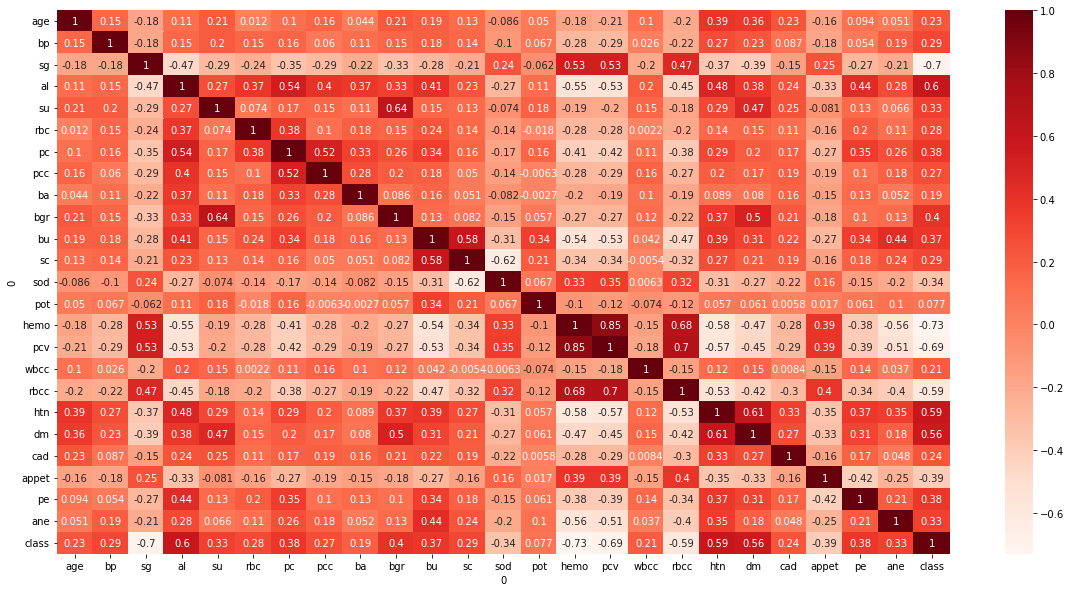

Significant list =  Index(['sg', 'al', 'hemo', 'rbcc', 'htn', 'dm'], dtype='object', name=0)
The pcv attribute is dropped due to high cross correlation between pcv and hemo. So only one out of them has been selected


In [84]:
##---------Type the code below this line------------------##
# Our target variable is Diagnosis
cor = raw_DF.corr()
print("This is the the HeatMap showing correlation of attributes: ")
# Plot Correlation HeatMap
plot_size = plt.subplots(figsize=(20,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = abs(cor["class"])
    
# The relevant features are ones which have correlation>0.5 with final class value
relevant_features = cor_target[cor_target>0.5]

# Put the most relevant features into a list
extracted_features = list(relevant_features.index)
##--------------------------------------------------------------------
# Intra attribute correlation analysis
extracted_features_df = raw_DF[extracted_features]
cor2 = extracted_features_df.corr()

extracted_attr_list = list(extracted_features)
attr_to_eliminate = set()

# Set the intra attribute threshold value
intra_attribute_thresh = 0.8

for i in range(0, int((len(extracted_features)+1)/2)):
    cor2_attr = abs(cor2[extracted_attr_list[i]])
    # Attributes with more than 80% correlation should be said as matching
    matching_attr_with_cor = cor2_attr[cor2_attr>intra_attribute_thresh]       
    matching_attr = list(matching_attr_with_cor.index)
    
    # Extract the target corr of all the matching attributes
    target_corr = relevant_features[matching_attr]
    
    if len(matching_attr) > 1:
        # Eliminate the minimum attribute
        attr_to_eliminate.add(target_corr.idxmin())
    
extracted_features_df = extracted_features_df.drop(attr_to_eliminate, axis=1)
extracted_features_df_X = extracted_features_df.drop('class', axis=1)
print("Significant list = ", extracted_features_df_X.columns)
print("The pcv attribute is dropped due to high cross correlation between pcv and hemo. So only one out of them has been selected")

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>) 

Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

In [40]:
##---------Type the code below this line------------------##

#4. Chi-Squared Test:
#Chi_Mat = np.zeros((len(X.columns) , len(X.columns) ))
#display(X['dm'])
#range(0,len(X.columns))
Chi_Mat = pd.DataFrame(data=[(0 for i in range(len(X.columns))) for i in range(len(X.columns))], columns=list(X.columns))
Chi_Mat.set_index(pd.Index(list(X.columns)), inplace = True)
for i in list(X.columns):
    for j in list(X.columns):
        if i!=j:
            chi2_val, p_val = chi2(np.array(X[i]).reshape(-1, 1), np.array(X[j]).reshape(-1, 1))
            Chi_Mat.loc[i,j] = chi2_val
        else:
            Chi_Mat.loc[i,j] = 1
            

ValueError: ignored

## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

In [ ]:
##---------Type the code below this line------------------##
# Train the classifier model
def train_classifier(Preprocessed_DF_X, y):

    # Split the dataset for training an testing
    x_train, x_test, y_train, y_test = train_test_split(Preprocessed_DF_X, y, test_size=0.33)

    # Train the classifier
    dt = DecisionTreeClassifier(random_state = 0)
    dt.fit(x_train,y_train)
    print("score :",dt.score(x_test,y_test))

    return dt
    
def plot_decision_tree(dt, features):

    classes = ['notckd', 'ckd']

    # Print the tree to console in text form 
    tree_text = tree.export_text(dt, feature_names = features)
    print(tree_text)

    # Plot the tree and save it
    fig = plt.figure(figsize=(25,20))
    my_tree = tree.plot_tree(dt, feature_names = features, class_names = classes, filled = True)
    fig.savefig("decision_tree.png")

decision_tree = train_classifier(extracted_features_df_X, y)
#print(extracted_features_df_X)
#features = list(extracted_features_df_X)
#plot_decision_tree(decision_tree, features)

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [ ]:
##---------Type the code below this line------------------##
sfs = SFS(decision_tree, 
           k_features=5, 
           forward=False, 
           floating=True, 
           verbose=0,
           scoring='accuracy',
           cv=0)
feature_names = list(X.columns)
sfs = sfs.fit(X, y, custom_feature_names=feature_names)
print("Top 5 features are as follows")
display(sfs.subsets_[5].get('feature_names'))

## 5.5 Conclude the top 3 significant features with necessary justifications.

From the above analysis we see that our top 3 features are: 
>* Albumin
>* Haemoglobin
>* Specific Gravity

We have 3 different sources to confirm this from
1. Heatmap: In the Heatmap, you will observe that the correlation of Albumin vs Class, Haemoglobin vs Class and Specific Gravity vs Class is highest (Value wise, +ve and -ve correlation is ignored). This shows that these 3 attributes contribute the maximum towards classification

2. Scatter Pair Plot: We see that with these attributes plotted against 'class' target variable, the data points are separable

3. Univariate Fliters: The Information Gain for the above listed attributes is high which indictes that these attributes are good for Decision Tree classification